In [24]:
# 1. 📦 Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [25]:
def limpiar_datos(df):
    # Guardar el número inicial de registros
    registros_iniciales = len(df)
    
    # 1. ✅ Renombrar columnas clave
    df = df.rename(columns={
        'churn': 'cancelacion',
        'customerid': 'id_cliente',
        'account_contract': 'tipo_contrato',
        'account_paperlessbilling': 'facturacion_electronica',
        'account_paymentmethod': 'metodo_pago',
        'account_charges.monthly': 'cargo_mensual',
        'account_charges.total': 'cargo_total',
        'customer_gender': 'genero',
        'customer_seniorcitizen': 'adulto_mayor',
        'customer_dependents': 'tiene_dependientes',
        'customer_partner': 'tiene_pareja',
        'internet_internetservice': 'tipo_internet',
        'internet_onlinesecurity': 'seguridad_online',
        'internet_onlinebackup': 'respaldo_online',
        'internet_deviceprotection': 'proteccion_dispositivo',
        'internet_techsupport': 'soporte_tecnico',
        'internet_streamingtv': 'tv_streaming',
        'internet_streamingmovies': 'peliculas_streaming',
        'phone_phoneservice': 'tiene_telefono',
        'phone_multiplelines': 'lineas_multiples'
    })

    # 2. ✅ Traducir valores de cancelación
    df['cancelacion'] = df['cancelacion'].map({'Yes': 'Canceló', 'No': 'Retenido'})

    # 3. ✅ Traducir valores booleanos comunes
    booleanas = [
        'facturacion_electronica', 'tiene_dependientes', 'tiene_pareja',
        'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
        'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
        'tiene_telefono', 'lineas_multiples'
    ]
    for col in booleanas:
        if col in df.columns:
            df[col] = df[col].replace({'Yes': 'Sí', 'No': 'No'})

    # 4. ✅ Adulto mayor como texto
    if 'adulto_mayor' in df.columns:
        df['adulto_mayor'] = df['adulto_mayor'].map({0: 'No', 1: 'Sí'})

    # 5. ✅ Manejo de valores nulos
    # Mostrar información sobre valores nulos antes de la limpieza
    nulos_por_columna = df.isnull().sum()
    if nulos_por_columna.any():
        print("Valores nulos por columna antes de la limpieza:")
        print(nulos_por_columna[nulos_por_columna > 0])
    
    # Eliminar filas con valores nulos
    df = df.dropna()
    
    # Calcular y mostrar el resumen de la limpieza
    registros_finales = len(df)
    registros_eliminados = registros_iniciales - registros_finales
    
    if registros_eliminados > 0:
        print(f"\nResumen de la limpieza:")
        print(f"- Registros iniciales: {registros_iniciales}")
        print(f"- Registros eliminados: {registros_eliminados}")
        print(f"- Registros finales: {registros_finales}")
        print(f"- Porcentaje de datos conservados: {(registros_finales/registros_iniciales)*100:.2f}%")

    return df

In [26]:
# 2. 📂 Cargar datos
df = pd.read_csv("../data/datos_telecomx.csv")
df = limpiar_datos(df)

Valores nulos por columna antes de la limpieza:
cancelacion    224
dtype: int64

Resumen de la limpieza:
- Registros iniciales: 7267
- Registros eliminados: 224
- Registros finales: 7043
- Porcentaje de datos conservados: 96.92%


In [27]:
df.head()

,id_cliente,cancelacion,genero,adulto_mayor,tiene_pareja,tiene_dependientes,customer_tenure,tiene_telefono,lineas_multiples,tipo_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,facturacion_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,Retenido,Female,No,Sí,Sí,9,Sí,No,DSL,...,Sí,No,Sí,Sí,No,One year,Sí,Mailed check,65.6,593.3
1,0003-MKNFE,Retenido,Male,No,No,No,9,Sí,Sí,DSL,...,No,No,No,No,Sí,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Canceló,Male,No,No,No,4,Sí,No,Fiber optic,...,No,Sí,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85
3,0011-IGKFF,Canceló,Male,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,Sí,No,Sí,Sí,Month-to-month,Sí,Electronic check,98.0,1237.85
4,0013-EXCHZ,Canceló,Female,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,No,Sí,Sí,No,Month-to-month,Sí,Mailed check,83.9,267.4


# ***📌 Paso 1: Exploración inicial***

In [28]:
# 3. 🔍 Información general
print('Información general del DataFrame')
df.info()


Información general del DataFrame
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               7043 non-null   object 
 1   cancelacion              7043 non-null   object 
 2   genero                   7043 non-null   object 
 3   adulto_mayor             7043 non-null   object 
 4   tiene_pareja             7043 non-null   object 
 5   tiene_dependientes       7043 non-null   object 
 6   customer_tenure          7043 non-null   int64  
 7   tiene_telefono           7043 non-null   object 
 8   lineas_multiples         7043 non-null   object 
 9   tipo_internet            7043 non-null   object 
 10  seguridad_online         7043 non-null   object 
 11  respaldo_online          7043 non-null   object 
 12  proteccion_dispositivo   7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 


In [29]:
# 4. 📊 Valores únicos por columna
print('Valores únicos por columna')
df.nunique().sort_values()

Valores únicos por columna


cancelacion                   2
genero                        2
adulto_mayor                  2
tiene_pareja                  2
tiene_telefono                2
tiene_dependientes            2
facturacion_electronica       2
tipo_internet                 3
proteccion_dispositivo        3
soporte_tecnico               3
seguridad_online              3
respaldo_online               3
tv_streaming                  3
peliculas_streaming           3
tipo_contrato                 3
lineas_multiples              3
metodo_pago                   4
customer_tenure              73
cargo_mensual              1585
cargo_total                6531
id_cliente                 7043
dtype: int64

In [30]:
# 5. ❌ Valores nulos
print('Valores nulos')
df.isnull().sum().sort_values(ascending=False)

Valores nulos


id_cliente                 0
cancelacion                0
genero                     0
adulto_mayor               0
tiene_pareja               0
tiene_dependientes         0
customer_tenure            0
tiene_telefono             0
lineas_multiples           0
tipo_internet              0
seguridad_online           0
respaldo_online            0
proteccion_dispositivo     0
soporte_tecnico            0
tv_streaming               0
peliculas_streaming        0
tipo_contrato              0
facturacion_electronica    0
metodo_pago                0
cargo_mensual              0
cargo_total                0
dtype: int64

# ***📌 Paso 2: Distribución de la variable objetivo (cancelacion)***

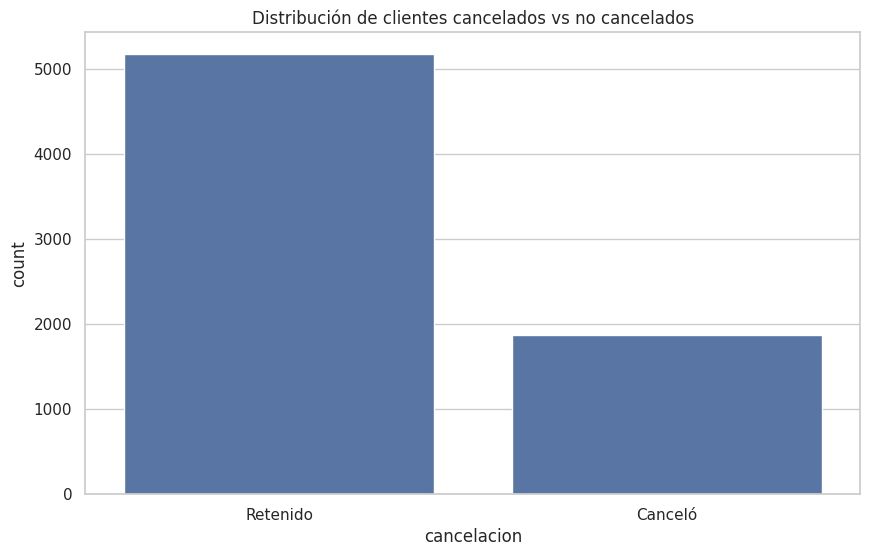

cancelacion
Retenido    0.73463
Canceló     0.26537
Name: proportion, dtype: float64

In [31]:
# 6. 📈 Distribución general
sns.countplot(x="cancelacion", data=df)
plt.title("Distribución de clientes cancelados vs no cancelados")
plt.show()

# Proporción
df["cancelacion"].value_counts(normalize=True)


# ***📌 Paso 3: Relación entre características y cancelacion***

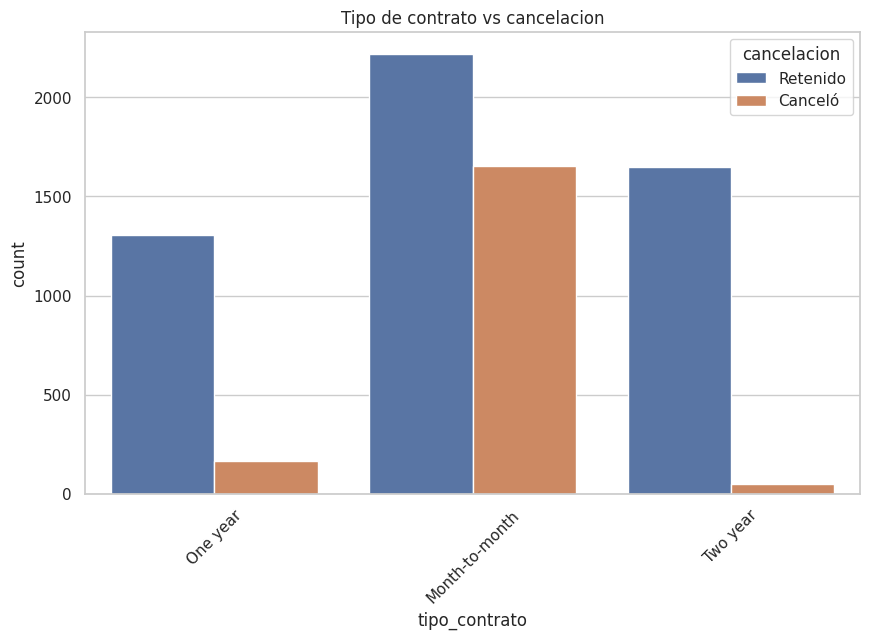

In [32]:
# 7. 🧮 Comparar churn por contrato
sns.countplot(x="tipo_contrato", hue="cancelacion", data=df)
plt.title("Tipo de contrato vs cancelacion")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_5565/1606186192.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


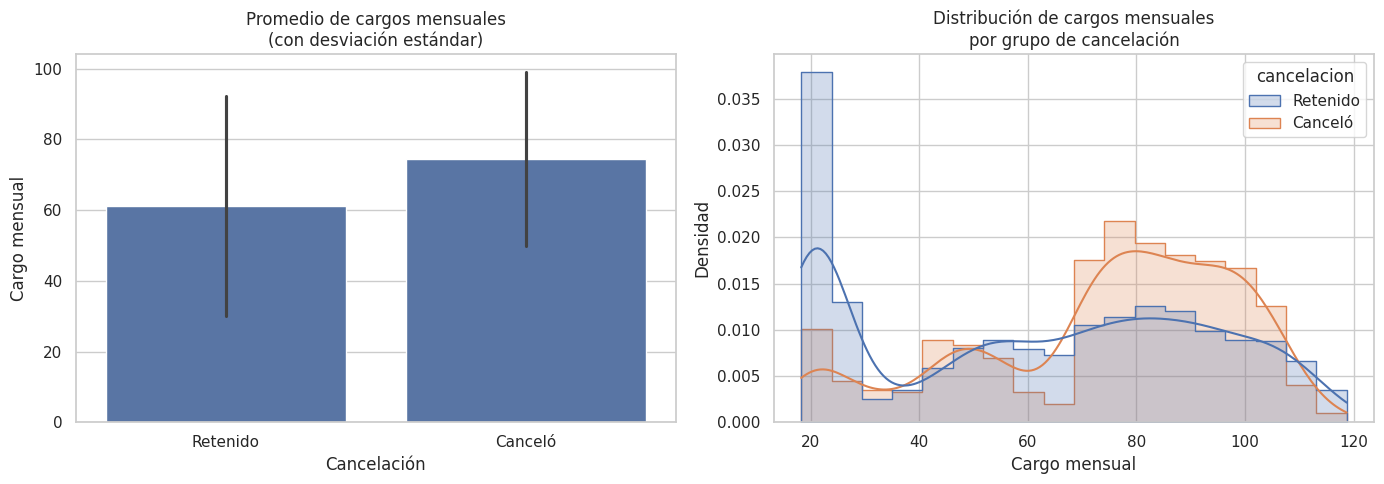

In [33]:
# Tamaño de la figura general
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 🎯 Subplot 1: Gráfico de barras (media + desviación estándar)
sns.barplot(
    data=df,
    x="cancelacion",
    y="cargo_mensual",
    ci="sd",
    ax=axes[0]
)
axes[0].set_title("Promedio de cargos mensuales\n(con desviación estándar)")
axes[0].set_xlabel("Cancelación")
axes[0].set_ylabel("Cargo mensual")

# 🎯 Subplot 2: Histograma con KDE
sns.histplot(
    data=df,
    x="cargo_mensual",
    hue="cancelacion",
    kde=True,
    element="step",
    stat="density",
    common_norm=False,
    ax=axes[1]
)
axes[1].set_title("Distribución de cargos mensuales\npor grupo de cancelación")
axes[1].set_xlabel("Cargo mensual")
axes[1].set_ylabel("Densidad")

# Ajuste final
plt.tight_layout()
plt.show()


# ***📌 Paso 4: Correlación de variables numéricas***

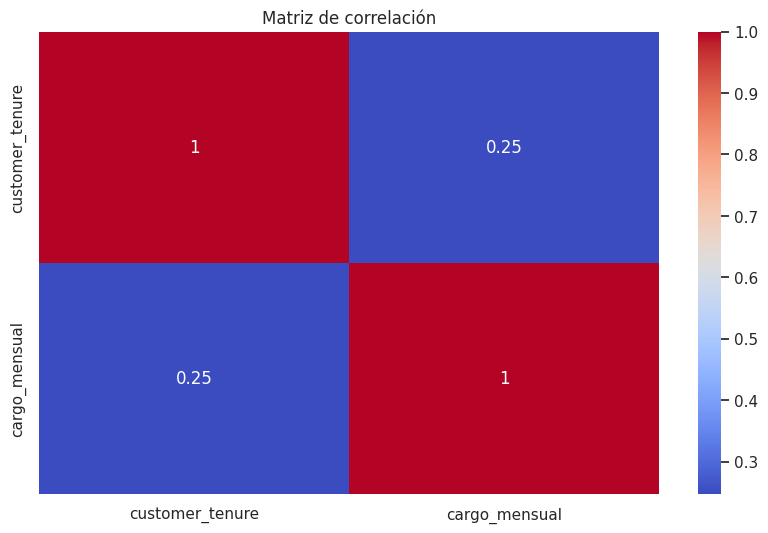

In [34]:
# 9. 🔗 Correlación
numericas = df.select_dtypes(include='number')
corr = numericas.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

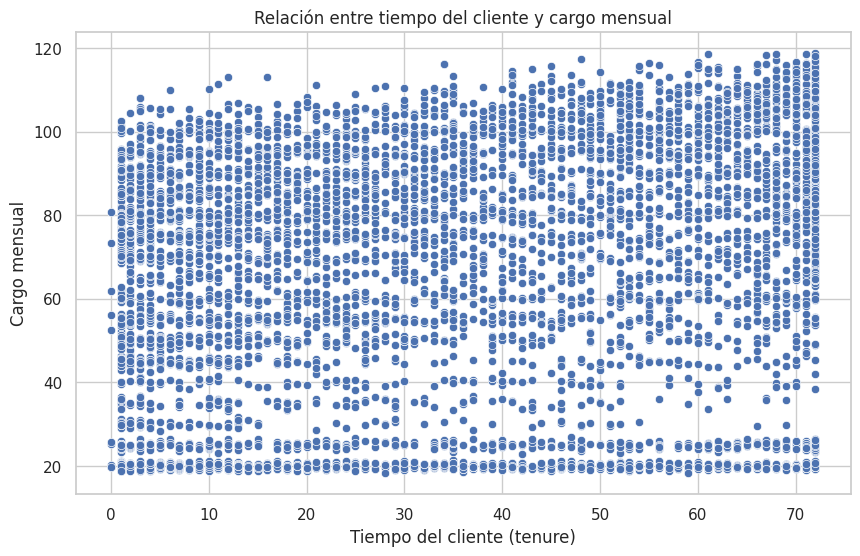

In [35]:
sns.scatterplot(data=df, x="customer_tenure", y="cargo_mensual")
plt.title("Relación entre tiempo del cliente y cargo mensual")
plt.xlabel("Tiempo del cliente (tenure)")
plt.ylabel("Cargo mensual")
plt.show()

# ***Código combinado para análisis explicativo***

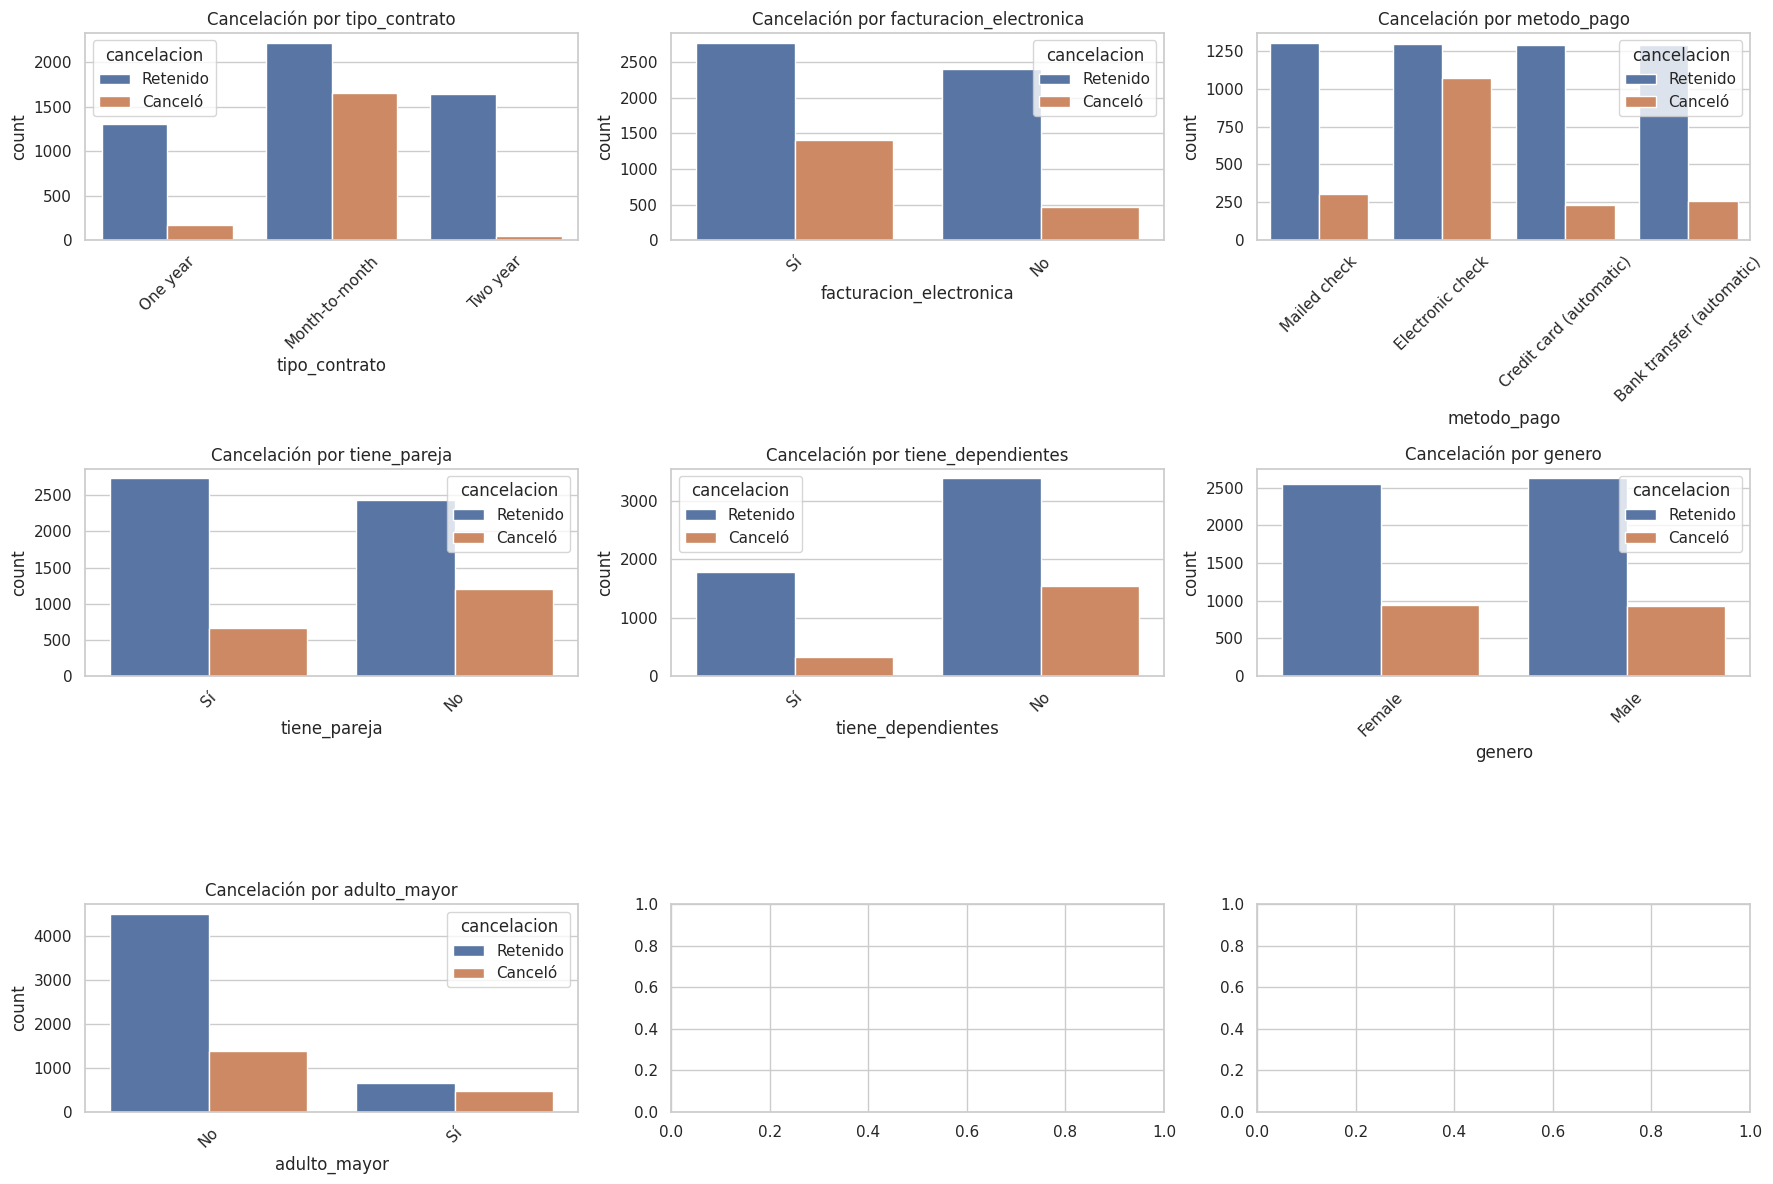

In [36]:
# ==============================
# 1. VARIABLES CATEGÓRICAS CLAVE
# ==============================

cat_vars = ['tipo_contrato', 'facturacion_electronica', 'metodo_pago', 'tiene_pareja', 'tiene_dependientes', 'genero', 'adulto_mayor']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.countplot(data=df, x=var, hue='cancelacion', ax=axes[i])
    axes[i].set_title(f'Cancelación por {var}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


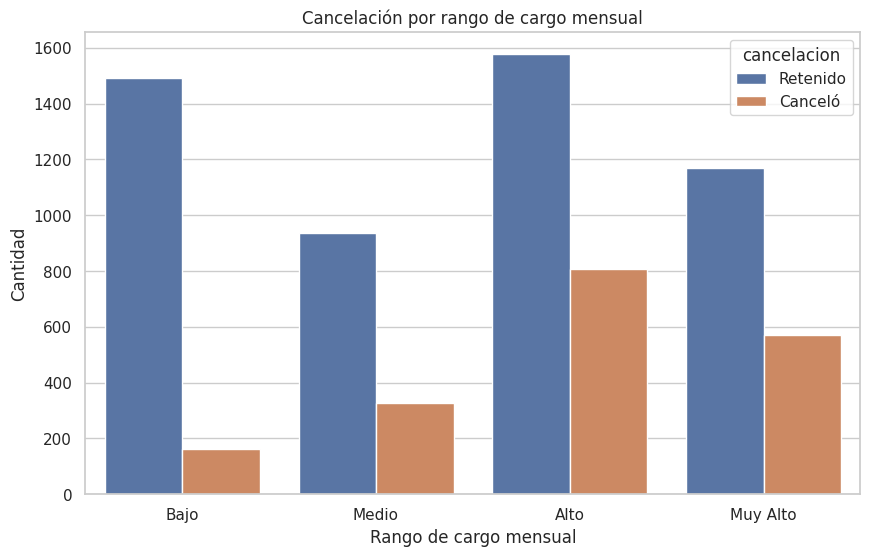

In [37]:
# ==============================
# 2. RANGOS DE CARGO MENSUAL
# ==============================

df['rango_cargo_mensual'] = pd.cut(df['cargo_mensual'], bins=[0, 30, 60, 90, 120], labels=['Bajo', 'Medio', 'Alto', 'Muy Alto'])

sns.countplot(data=df, x='rango_cargo_mensual', hue='cancelacion')
plt.title('Cancelación por rango de cargo mensual')
plt.xlabel('Rango de cargo mensual')
plt.ylabel('Cantidad')
plt.show()


In [38]:
# ==============================
# 3. TABLAS DE PROPORCIÓN DE CANCELACIÓN
# ==============================

for var in cat_vars + ['rango_cargo_mensual']:
    print(f"\n📊 Proporción de cancelación por: {var}")
    display(pd.crosstab(df[var], df['cancelacion'], normalize='index').round(2))
    



📊 Proporción de cancelación por: tipo_contrato


cancelacion,Canceló,Retenido
tipo_contrato,,
Month-to-month,0.43,0.57
One year,0.11,0.89
Two year,0.03,0.97



📊 Proporción de cancelación por: facturacion_electronica


cancelacion,Canceló,Retenido
facturacion_electronica,,
No,0.16,0.84
Sí,0.34,0.66



📊 Proporción de cancelación por: metodo_pago


cancelacion,Canceló,Retenido
metodo_pago,,
Bank transfer (automatic),0.17,0.83
Credit card (automatic),0.15,0.85
Electronic check,0.45,0.55
Mailed check,0.19,0.81



📊 Proporción de cancelación por: tiene_pareja


cancelacion,Canceló,Retenido
tiene_pareja,,
No,0.33,0.67
Sí,0.20,0.80



📊 Proporción de cancelación por: tiene_dependientes


cancelacion,Canceló,Retenido
tiene_dependientes,,
No,0.31,0.69
Sí,0.15,0.85



📊 Proporción de cancelación por: genero


cancelacion,Canceló,Retenido
genero,,
Female,0.27,0.73
Male,0.26,0.74



📊 Proporción de cancelación por: adulto_mayor


cancelacion,Canceló,Retenido
adulto_mayor,,
No,0.24,0.76
Sí,0.42,0.58



📊 Proporción de cancelación por: rango_cargo_mensual


cancelacion,Canceló,Retenido
rango_cargo_mensual,,
Bajo,0.10,0.90
Medio,0.26,0.74
Alto,0.34,0.66
Muy Alto,0.33,0.67


# ***✅ Conclusión***

| Variable                  | Hallazgo Principal                                                         | Impacto en Cancelación | Posible Acción Estratégica                       |
| ------------------------- | -------------------------------------------------------------------------- | ---------------------- | ------------------------------------------------ |
| `tipo_contrato`           | Clientes con contrato **mensual** cancelan mucho más que los de 1 o 2 años | Muy Alto 🔥            | Incentivar contratos largos con descuentos       |
| `metodo_pago`             | Mayor cancelación en **tarjetas electrónicas y pagos automáticos**         | Alto                   | Investigar percepción de inseguridad o confianza |
| `facturacion_electronica` | Usuarios con **facturación electrónica** presentan más cancelaciones       | Moderado               | Evaluar claridad de las facturas digitales       |
| `rango_cargo_mensual`     | Clientes con cargos mensuales **altos (>90)** muestran mayor cancelación   | Alto                   | Ofrecer planes personalizados o descuentos       |
| `tiene_pareja`            | Clientes **sin pareja** cancelan más que quienes tienen pareja             | Bajo a Moderado        | Promover servicios en paquetes familiares        |
| `tiene_dependientes`      | Clientes **sin dependientes** cancelan más                                 | Bajo                   | Reforzar beneficios familiares o de lealtad      |
| `genero`                  | No hay diferencias significativas entre hombres y mujeres                  | Bajo                   | Sin acción necesaria                             |
| `adulto_mayor`            | Leve mayor cancelación en **adultos mayores**                              | Bajo                   | Asegurar atención y canales sencillos para ellos |


---

##  **Conclusión general sobre cancelación de clientes en Telecom X:**

1. **El principal factor asociado a la cancelación es el tipo de contrato.**

   * Los contratos **mensuales** muestran una tasa de cancelación significativamente mayor que los contratos a **uno o dos años**.
   * **Impacto: Muy Alto 🔥**

2. **Los métodos de pago también influyen fuertemente.**

   * Clientes que pagan con **tarjetas electrónicas o pagos automáticos** cancelan más.
   * Esto puede reflejar una falta de vínculo o menor percepción de control del servicio.
   * **Impacto: Alto**

3. **El cargo mensual elevado** está correlacionado con una mayor tasa de cancelación.

   * Clientes con un plan mensual **superior a \$90** tienen más probabilidad de cancelar.
   * **Impacto: Alto**

4. **La facturación electrónica** también presenta un aumento en cancelaciones.

   * Podría deberse a una mala experiencia con la interfaz o falta de claridad en los cobros.
   * **Impacto: Moderado**

5. **Otros factores como tener pareja o dependientes** tienen influencia leve, pero muestran que los clientes con vínculos familiares tienden a permanecer más tiempo.

---